**Universidade Estadual de Campinas - Unicamp**

**Faculdade de Tecnologia - FT**

**Autor:** Ulisses Martins Dias

**Disciplina:** TT003 - Tópicos em Computação e Informática III

**Aula 11:** Monte Carlo com Jogo da Velha

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ulissesdias/tt003/blob/main/notebooks/aula11_monte_carlo_com_jogo_da_velha.ipynb)

# Monte Carlo com Jogo da Velha

Vamos agora exemplificar o uso do algoritmo de Monte Carlo com um jogo bastante simples, um jogo da velha, e ver como ele se comporta e se converge rápida ou lentamente. Para tanto, precisamos definir o ambiente onde o jogador irá se movimentar. Vale lembrar que o que precisamos é:

1. Um mecanismo que nos diga quais as jogadas possíveis a partir de um determinado estado.
2. Um mecanismo que nos diga quando o jogo acabou.

A seguir, vamos criar um conjunto de métodos que utilizamos para criar o jogo da velha. Note que não precisaremos fazer o mesmo para o jogo de xadrez, porque muito já foi implementado pela biblioteca chess, que aprendemos em semanas anteriores.

As regras do jogo da velha dispensam grandes introduções. Entretanto, para manter o notebook auto-contido, vamos explicar algumas coisas óbvias.

No jogo da velha, temos dois tipos de peças, a peça **"x"** e a peça **"o"**. Cada um dos dois jogadores é responsável por adicionar um tipo de peça. Vence quem formar uma sequência de três na horizontal, vertical ou diagonal. Vamos primeiramente pensar em como podemos representar um tabuleiro de jogo da velha:

## Jogadores

O jogo da velha é jogado por dois jogadores. Seguiremos um padrão para nomear os jogadores:

**O jogador que inicia a partida será chamado de "1", o outro jogador será chamado de "-1"**

Como no jogo da velha as peças **x** começam, então o jogador que conduz as peças **x** será o jogador **1**, enquanto que o jogador que conduz as peças **o** será chamado de **-1**.


## Tabuleiro

A forma mais óbvia de representar o tabuleiro é por meio de uma tupla de nove elementos, onde cada elemento representa uma célula do tabuleiro. Outras formas poderiam ser pensadas, uma matriz ou uma string, por exemplo, mas vamos seguir com um tupla.

Cada célula do tabuleiro pode:


1.   Estar vazia
2.   Conter **x**
3.   Conter **o**

Como são três estados possíveis, podemos representar uma célula vazia com o número zero, uma célula com **x** com o número **1** (dado que o jogador que conduz o **x** é chamado de jogador **1**), e uma célula com **o** com o número **-1** (dado que o jogador que conduz as bolas é chamado de **-1**). Dessa forma, a seguir temos um tabuleiro vazio:

tabuleiro = (
    
             0, 0, 0,

             0, 0, 0,
             
             0, 0, 0
             
)

A seguir, temos um tabuleiro com um **x** no canto superior esquerdo.

tabuleiro = (
    
             1, 0, 0,

             0, 0, 0,
             
             0, 0, 0
             
)

A seguir, temos um tabuleiro com um **x** no canto superior esquerdo e um **o** no centro.

tabuleiro = (
    
             1, 0, 0,

             0,-1, 0,
             
             0, 0, 0
             
)

Em jogos com classes de peças, como o xadrez, seria interessante dar números diferentes para cada peça. Por exemplo: peão = 1, cavalo = 2, bispo = 3, torre = 4, rainha = 5, rei = 6. Feito isso, um peão branco seria representado como **1** e um peão preto seria representado como **-1**, um cavalo branco seria o **1** e um cavalo preto seria o **-1**.

Vamos implementar um tabuleiro em nosso código:


In [ ]:
## Tabuleiro vazio:
tabuleiro = (0,0,0, 0,0,0, 0,0,0)

Note que a implementação é bastante simples, passamos mais tempo explicando do que realmente programando.

## Vencedor do Jogo

Agora que definimos um tabuleiro, devemos codificar as regras que definem quem venceu a partida. Para vencer uma partida no jogo da velha, um jogador precisa preencher uma linha, uma coluna, ou uma diagonal. Podemos começar listando todas as combinações de índices que podem gerar uma vitória:


**Linhas:**

*   **0, 1, 2**
*   **3, 4, 5**
*   **6, 7, 8**

**Colunas:**
*   **0, 3, 6**
*   **1, 4, 7**
*   **2, 5, 8**

**Diagonais:**
*   **0, 4, 8**
*   **2, 4, 6**

São poucas as combinações de vitórias, então podemos muito bem criar uma função que verifica se alguma delas foi satisfeita. Como não é função desta aula ver em detalhes como as implementações do jogo da velha foram feitas. Precisamos apenas colocar todas elas em um lugar acessível. Veja a célula abaixo para entender qual biblioteca usaremos.

In [1]:
## Efetuando o download do código da biblioteca
!wget https://raw.githubusercontent.com/ulissesdias/tt003/main/libraries/tic_tac_toe.py

## Importando a biblioteca
import tic_tac_toe as ttt

--2023-11-21 19:25:09--  https://raw.githubusercontent.com/ulissesdias/tt003/main/libraries/tic_tac_toe.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3674 (3.6K) [text/plain]
Saving to: ‘tic_tac_toe.py’

tic_tac_toe.py      100%[===================>]   3.59K  --.-KB/s    in 0s      

2023-11-21 19:25:10 (51.3 MB/s) - ‘tic_tac_toe.py’ saved [3674/3674]



Note que a biblioteca que está no link acima pode ser analisada manualmente por você.

In [2]:
tab = [1,1,-1, 1,-1,0, -1,1,-1]
ttt.winner(tab)

-1

## Movimentos Válidos

Agora que temos uma definição do tabuleiro e uma definição das condições de vitória, precisamos definir as jogadas válidas na partida. No jogo da velha, um jogador pode inserir uma peça em qualquer célula não preenchida. Nesse caso, podemos representar uma jogada válida como o índice de uma célula não preenchida. Por exemplo, a função **ttt.get_valid_moves** retorna os movimentos válidos a partir de um tabuleiro. No tabuleiro mostrado abaixo, apenas a célula 5 está vazia, então esta célula é o único movimento válido.

In [3]:
tab = [1,1,-1, 1,-1,0, -1,1,-1]
ttt.get_valid_moves(tab)

[5]

## Gerando Jogadas ao Acaso

Supondo que queremos criar um **bot** para jogar jogo da velha, o que ele precisa saber? Obviamente ele precisa saber quais são as jogadas válidas e qual peças ele está conduzindo. Basta isso para criarmos um jogador sem nenhum tipo de inteligência, que escolha ao acaso uma jogada dentre todas as disponíveis.

Se quisermos que o jogador tenha algum tipo de inteligência, provavelmente ele precisará de uma função que possibilite a pontuação dos tabuleiros. Essa função receberá um determinado tabuleiro e dará uma nota para o tabuleiro, uma espécie de **score**, quanto maior o **score** do tabuleiro, melhor ele é segundo a função de pontuação.

A seguir, vamos tentar uma primeira implementação e depois podemos reformular o nosso jogador para que tenha algum tipo de inteligência.

In [4]:
tabuleiro = (1, -1, -1,  1, -1, 1,  1, 0, 0)

## O jogador retornará a peça que irá colocar no
## tabuleiro, seguida da posição no tabuleiro onde
## deverá colocar a peça.
ttt.random_player(tabuleiro, -1)

(-1, 7)

## Gerando Episódios

Temos um tabuleiro e um jogador que pode conduzir qualquer uma das peças. O que devemos fazer agora é criar um gerenciador de jogo para que uma partida possa ser iniciada e conduzida. Cada partida será chamada de episódio. O gerenciador de um jogo gerará um episódio. Ele deverá:

1.   Garantir que pedirá para o jogador certo jogar (alternância entre jogadores **x** e **o**).
2.   Gerenciar o tabuleiro de modo a fazer com que as jogadas sejam concretizadas.
3.   Verificar se as condições de vitória, derrota ou empates já foram satisfeitas.
4.   Armazenar um histórico de jogadas, para que os jogadores posteriormente possam analisar o que fizeram. Esse histórico de jogadas será o episódio propriamente dito e com ele deveremos ser capazes de ver, de alguma forma, todas as ações realizadas.

Vamos ver uma função que faz tudo isso.

In [5]:
### Selecionando jogadores:
player = ttt.random_player

In [6]:
## Iniciando uma partida
result, history = ttt.game(player, player)
print(result)
print(history)

0
[(0, 0, 0, 0, 1, 0, 0, 0, 0), (0, 0, 0, 0, 1, -1, 0, 0, 0), (0, 0, 0, 0, 1, -1, 0, 0, 1), (0, 0, 0, 0, 1, -1, -1, 0, 1), (0, 1, 0, 0, 1, -1, -1, 0, 1), (0, 1, 0, 0, 1, -1, -1, -1, 1), (0, 1, 0, 1, 1, -1, -1, -1, 1), (-1, 1, 0, 1, 1, -1, -1, -1, 1), (-1, 1, 1, 1, 1, -1, -1, -1, 1)]


Note que o seu primeiro passo ao implementar uma agente para qualquer jogo, ou qualquer ambiente, é conseguir gerar o que fizemos até aqui: **criar um mecanismo para gerar episódios ao acaso**. No caso específico de jogos é que um episódio pode ser visto como o resultado de uma partida.

# Interface Gráfica

Criamos uma representação para o jogo da velha. Se é uma boa implementação ou não é um tema sujeito a discussões, o que importa é que criamos. O nosso jogo ficaria mais divertido se pudéssemos criar uma interface gráfica para visualizar o que foi jogado pelos nossos bots e por nós mesmos. Isso permitirá verificar se o nosso jogador é bom ou não. Além disso, poderemos depurar por eventuais erros difíceis de ver no estado atual baseado em textos.

Note que você não precisa entender esta interface gráfica. Ela está aqui apenas para você ver os códigos. A única coisa que você precisa conhecer são as seguintes funções:

**draw_board(tab):** desenha um tabuleiro no console.

**generate_image_history(history):** dado um episódio, aqui chamado de histórico de jogadas, geraremos uma sequência de imagens, que são todos os tabuleiros vistos no episódio.

**display_sequence(images):** dadas as imagens geradas com a função acima. Apresente a sequência no console.


## Desenhando Tabuleiro

Vamos simplesmente empacotar tudo o que aprendemos até agora em uma função que recebe um tabuleiro e devolve uma representação gráfica do mesmo. Nada do que tem na função a seguir deve ser desconhecido para você.

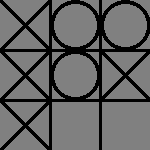

In [7]:
tabuleiro = (1, -1, -1,  1, -1, 1,  1, 0, 0)
board = ttt.draw_board(tabuleiro)
display(board)

## Partida Completa

Agora que temos uma maneira de desenhar um tabuleiro, vamos mostrar uma partida completa como uma sequência de tabuleiros. Para tanto, é interessante que o usuário possa ver a partida em sequência, olhar um tabuleiro específico, avançar ou recuar na análise, ...

A função abaixo faz tudo isso, ela considera todas as imagens como frames de uma widget interativa, o usuário pode navegar para qualquer frame facilmente.

In [8]:
history = [
    (1, 0, 0, 0, 0, 0, 0, 0, 0),
    (1, -1, 0, 0, 0, 0, 0, 0, 0),
    (1, -1, 0, 0, 1, 0, 0, 0, 0),
    (1, -1, 0, 0, 1, 0, -1, 0, 0),
    (1, -1, 0, 1, 1, 0, -1, 0, 0),
    (1, -1, 0, 1, 1, 0, -1, 0, -1),
    (1, -1, 1, 1, 1, 0, -1, 0, -1),
    (1, -1, 1, 1, 1, 0, -1, -1, -1)
    ]

images = ttt.generate_image_history(history)

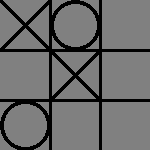

In [9]:
display(images[3])

Para usar a função **display_sequence**, precisamos de uma sequência de objetos **Image**, podemos obter essa sequência invocando várias vezes o método **draw_board**. Nesse caso, para fazer essa sequência de invocações, precisamos de um histórico, que pode ser obtido facilmente a partir de qualquer jogo obtido mediante a invocação da função **game**.

De posse desse histórico, podemos criar a função a seguir que percorre os tabuleiros e gera as imagens.

In [10]:
ttt.display_sequence(images)

interactive(children=(IntSlider(value=3, description='frame', max=7), Output()), _dom_classes=('widget-interac…

<function tic_tac_toe.display_sequence.<locals>._show(frame=(0, 7))>

## Exemplo

Vamos agora dar um exemplo daquilo que você precisa saber:

In [11]:
_, history = ttt.game(player, player)
images = ttt.generate_image_history(history)


De posse de qualquer tabuleiro, podemos também imprimir aquela posição:



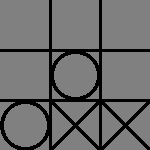

In [12]:
ttt.draw_board( history[3] )

# Validando Jogadores

Antes de mais nada, vamos criar uma função que gerencia uma série de rodadas para no final sabermos qual jogador está se saindo melhor. A essa série de rodadas chamaremos de **campeonato**. Começaremos com uma implementação simples do **campeonato** só para saber a dinâmica do jogo.

In [13]:
def campeonato(player1, player2, num_games = 1000) :
    results = [0,0,0]
    for i in range(num_games) :
        result, x = ttt.game(player1, player2)
        results[result] += 1
    return tuple(results)

In [14]:
results = campeonato(player, player, 1000)
print("Draw = %i, P1 = %i, P2 = %i" % results)

Draw = 145, P1 = 571, P2 = 284


Dado o que vimos acima, o jogador que começa parece ter mais chances de ganhar, uma informação muito importante! Notamos que o jogador **1** e o jogador **-1** têm a mesma inteligência, mas mesmo assim o jogador **1** ganha muito mais vezes.  Usaremos essa informação futuramente para comparar o resultado após melhorar os jogadores com o algoritmo de Monte Carlo.





## Recompensando Tabuleiros

No nosso jogo, daremos uma recompensa apenas pela vitória ou pela derrota. Não daremos recompensas para tabuleiros parciais. Entretanto, vale ressaltar que isso poderia ser feito. O código será muito simples, usaremos apenas a função winner.

Observe que isso poderia ser modificado. No Xadrez, por exemplo, um tabuleiro não precisa chegar no final do jogo para darmos recompensa, podemos recompensar por:

* Quantidade de peças;
* Força das peças;
* Segurança do rei;
* Mobilidade;
* Muitos outros.

No nosso caso, achamos que apenas o resultado final dará informações suficientes.

In [15]:
def rewards(tab) :
    lwinner = ttt.winner(tab)
    if lwinner == 0 :
        return -1
    elif lwinner == 1 :
        return 10
    else :
       return -10


## Jogador com Política

A inteligência do jogador depende exclusivamente da política e esta depende exclusivamente de quão bem calculados são os state-values. Como Monte Carlo pode ser usado para resolver o processo de **evaluation**, podemos melhorar a política com os novos **state-values**. Várias abordagens são possívels. Por exemplo, podemos executar Monte Carlo com um número fixo de episódios e depois atualizar a política.

Uma segunda abordagem que podemos tentar com Monte Carlo é  atualizar a política a cada episódio. Nesse caso, o tempo computacional tende a ser menor. À medida em que a política evolui para a política ótima, os episódios tendem a ser muito mais curtos. Entretanto, um cuidado precisa ser tomado, porque a política pode acabar convergindo muito rapidamente para uma situação não ótima, dando pesos 0 para ações que poderiam ainda ser exploradas.

Para evitar que isso aconteça, podemos dar uma probabilidade, nem que seja bem baixa de a política explorar qualquer ação ao acaso. Em outras palavras, podemos assumir que todas as ações terão no mínimo uma probabilidade $\epsilon$ de ocorrer. Isso garante que nunca deixaremos de explorar.

Esta será a abordagem que seguiremos aqui. O nosso jogador não irá seguir a política em uma quantidade de vezes indicada por $\epsilon$.

In [19]:
import random

## Para computação dos state_values, usaremos gamma = 0.7 para
## descontos futuros
gamma = 0.7

## Os state_values serão uma variável global neste notebook. Nele
## estará contido tudo aquilo que o agente precisa para fazer uma boa
## jogada
state_values = {}


def player_rl(tab, turn, epsilon = 0) :
    valid_moves = ttt.get_valid_moves(tab)

    epsilon_random = random.random()
    if epsilon_random < epsilon :
      return turn, random.choice(valid_moves)
    else :
      ## A nossa política será fazer o movimento de acordo com os state_values.
      ## Escolheremos um dos melhores movimentos. Se turn = 1, significa maximizar
      ## os state_values, caso contrário seria minimizar.
      scores = []
      for move in valid_moves :
        next_state = list(tab)
        next_state[move] = turn

        ## Vejam que estamos inicializando com zero.
        scores.append(rewards(tuple(next_state)) + gamma*state_values.get(tuple(next_state), 0))

      ## Analisando qual o best score de um tabuleiro.

      best_score = None
      if (turn == 1) :
          best_score = max(scores)
      else :
          best_score = min(scores)


      ## Selecionando quais as jogadas de melhor score. Em caso de empate,
      ## escolheremos ao acaso.
      best_moves = []
      for i in range(len(scores)) :
        if scores[i] == best_score :
          best_moves.append(valid_moves[i])

      ## retornando um dos melhores movimentos
      return turn, random.choice(best_moves)

# Monte Carlo

Existe uma interseção muito grande entre o nosso conceito de episódio e o resultado já devolvido pela função **game**. O nosso jogador poderá jogar tanto com as peças brancas quanto com as peças pretas. Nesse caso, usaremos a mesma pontuação de **state_values** para ambas as situações. Se o jogador estiver jogando com as brancas, tentará maximizar.

## Atualizando Valores

In [20]:
## O código a seguir atualiza os state_values. Note que esses state_values
## são uma variável global.

def update_state_values_monte_carlo(rewards, amostra, gamma = 0.7, alpha = 0.1) :
    ## Definiremos o último state_value como zero para iniciar o processo iterativo.
    discounted_return = 0
    next_state        = amostra[-1]

    ## Observe o uso de "reversed" estamos iterando de trás pra frente.
    for state in reversed(amostra[:-1]) :
        ## Abaixo simplesmente computamos o retorno a longo prazo e somamos com a recompensa imediata
        discounted_return = gamma*discounted_return + rewards(next_state)

        ## Abaixo a fórmula para atualização dos state-values. Isso substitui o valor esperado (média).
        ## Note que estamos inicializando os state_values com zero
        state_values[state] = state_values.get(state,0) + alpha*(discounted_return - state_values.get(state, 0))
        next_state = state


## Efetuando Aprendizado

In [23]:
alpha  = 0.1 ## Aproximação da média

## Reiniciando os state_values, ou seja, o jogador não tem conhecimento prévio
state_values = {}

ITERACOES = 40000
for i in range(ITERACOES) :
  epsilon = max(0.01, (ITERACOES - i)/ITERACOES)

  _, amostra = ttt.game(player_rl, player_rl, epsilon = epsilon)
  update_state_values_monte_carlo(rewards, amostra, gamma, alpha)


## Validando Resultados

Vamos agora colocar o possante jogador contra alguém ao acaso.

In [25]:
results = campeonato(player, player_rl)
print("Draw = %i, Acaso = %i, RL = %i" % results)

results = campeonato(player_rl, player)
print("Draw = %i, RL = %i, Acaso = %i" % results)

Draw = 491, Acaso = 0, RL = 509
Draw = 5, RL = 995, Acaso = 0


In [26]:
result, history = ttt.game(player, player_rl)
images = ttt.generate_image_history(history)
ttt.display_sequence(images)

interactive(children=(IntSlider(value=4, description='frame', max=8), Output()), _dom_classes=('widget-interac…

<function tic_tac_toe.display_sequence.<locals>._show(frame=(0, 8))>

O jogador ficou melhor do que era antes? A distribuição de vitórias e derrotas é melhor do que o jogador ao acaso?

# Desafiando Humanos

Que tal agora desafiar um humano? Vamos gerar um código que torne isso possível, não faremos nada muito mirabolante, apenas trocaremos as chamadas de **print** para **display(board)**.


In [27]:
def human_player(tab, turn) :
    valids  = ttt.get_valid_moves(tab)
    print(valids)

    board = ttt.draw_board( tab )
    display(board)
    move = int(input())

    while not move in valids :
        move = int(input())
    return turn, move

[0, 1, 3, 4, 5, 6, 7, 8]


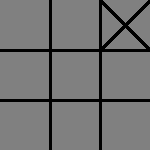

0
[1, 3, 4, 5, 6, 7]


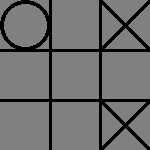

5
[1, 3, 4, 7]


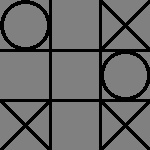

7


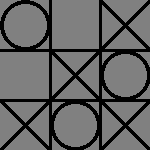

In [31]:
result, history = ttt.game(player_rl, human_player)
ttt.draw_board(history[-1])

In [32]:
images = ttt.generate_image_history(history)
ttt.display_sequence(images)

interactive(children=(IntSlider(value=3, description='frame', max=6), Output()), _dom_classes=('widget-interac…

<function tic_tac_toe.display_sequence.<locals>._show(frame=(0, 6))>

In [33]:
len(state_values)

4519